# load float log

In [3]:
import os
from glob import glob
import yaml

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import cognac.ufloat as fl
import cognac.ufloat.seabot as sb

---
## load data

In [4]:
#root_dir = '/Users/aponte/Current_projects/cognac/tests/202006_ifremer/data/'
root_dir = '/Users/aponte/Current_projects/cognac/tests/202007_ifremer/'

#root_dir = root_dir+'bassin0_bags/'
#root_dir = root_dir+'bassin1_bags/'
#root_dir = root_dir+'bassin2_bags/'
root_dir = root_dir+'bassin3_bags/'

bags = sb.find_bags(root_dir)
logs = sb.find_logs(root_dir)

for b in bags:
    print(b)

/Users/aponte/Current_projects/cognac/tests/202007_ifremer/bassin3_bags/pd_2020-07-02-10-19-18_0
/Users/aponte/Current_projects/cognac/tests/202007_ifremer/bassin3_bags/pd_2020-07-02-10-39-22_0
/Users/aponte/Current_projects/cognac/tests/202007_ifremer/bassin3_bags/pd_2020-07-02-11-27-21_0
/Users/aponte/Current_projects/cognac/tests/202007_ifremer/bassin3_bags/pd_2020-07-02-12-04-00_0
/Users/aponte/Current_projects/cognac/tests/202007_ifremer/bassin3_bags/pd_2020-07-02-12-26-02_0


In [5]:
# compare configurations
_c0 = None
for i, f, l in zip(range(len(bags)), bags, logs):
    print('-- mission {}, {} --'.format(i, f.split('/')[-1]))
    bdata = sb.load_bag(f)
    avel = bdata['mission']['approach_velocity'].median()
    lvel = bdata['mission']['limit_velocity'].median()
    print('limit_velocity = {}, approach_velocity = {}'.format(lvel, avel))
    _c1 = sb.load_config_from_log(l)
    if _c0:
        sb.compare_config(_c0, _c1)
    _c0 = _c1
    print('')

-- mission 0, pd_2020-07-02-10-19-18_0 --
limit_velocity = 0.10000000149011612, approach_velocity = 1.0

-- mission 1, pd_2020-07-02-10-39-22_0 --
limit_velocity = 0.10000000149011612, approach_velocity = 1.0
driver->filter->iridium->kalman->mission->physics->regulation->depth_controller :
 -  delta_position_lb  :  0.0
 +  delta_position_lb  :  -0.1
driver->filter->iridium->kalman->mission->physics->regulation->depth_controller :
 -  delta_position_ub  :  0.0
 +  delta_position_ub  :  0.1
driver->filter->iridium->kalman->mission->physics->regulation->depth_controller :
 -  delta_velocity_lb  :  0.0
 +  delta_velocity_lb  :  -0.01
driver->filter->iridium->kalman->mission->physics->regulation->depth_controller :
 -  delta_velocity_ub  :  0.0
 +  delta_velocity_ub  :  0.01
driver->filter->iridium->kalman->mission->physics->regulation->depth_controller :
 -  hold_depth_enable  :  True
 +  hold_depth_enable  :  False

-- mission 2, pd_2020-07-02-11-27-21_0 --
limit_velocity = 0.100000001490

Text(0.5, 1.0, 'piston position')

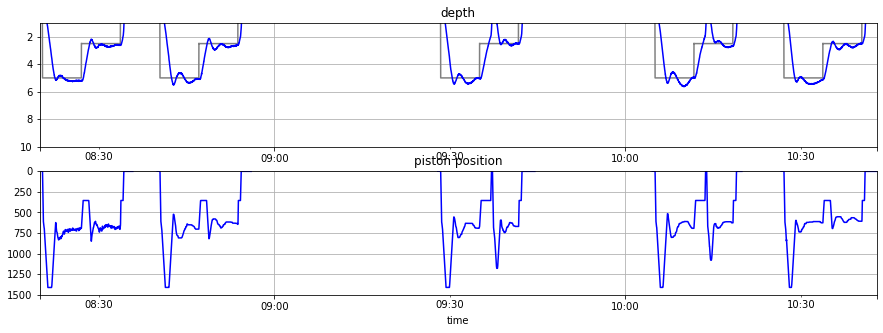

In [6]:
fig, ax = plt.subplots(2,1, figsize=(15,5))

for f in bags:
    bdata = sb.load_bag(f)
    df = sb.resample_join('1s',
                      bdata['depthFusion']['depth'],
                      bdata['pistonState']['position'],
                      bdata['mission']['depth'].rename('depth_target')
                     )
    df['depth_target'].plot(color='0.5',
                     ax=ax[0],
                     ylim=(1,10))
    df['depth'].plot(color='b',
                     ax=ax[0],
                     ylim=(1,10))
    df['position'].plot(color='b',
                        ax=ax[1],
                        ylim=(0,1500))
ax[0].invert_yaxis()
ax[0].grid()
ax[0].set_title('depth')
ax[0].set_xlabel('')
#
ax[1].invert_yaxis()
ax[1].grid()
ax[1].set_title('piston position')

Text(0.5, 1.0, 'piston position')

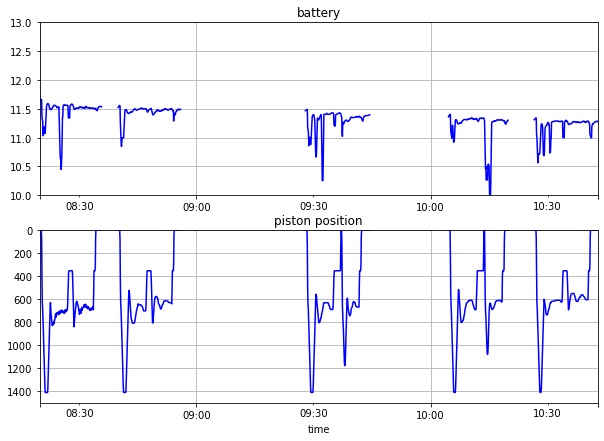

In [7]:
fig, ax = plt.subplots(2,1, figsize=(10,7))

for f in bags:
    bdata = sb.load_bag(f)
    df = sb.resample_join('5s',
                      bdata['depthFusion']['depth'],
                      bdata['pistonState']['position'],
                      bdata['batteryFusion']['b1'].rename('battery')
                     )
    df['battery'].plot(color='b',
                     ax=ax[0],
                     ylim=(10,13))
    df['position'].plot(color='b',
                        ax=ax[1],
                        ylim=(0,1500))
ax[0].grid()
ax[0].set_title('battery')
ax[0].set_xlabel('')
ax[1].invert_yaxis()
ax[1].grid()
ax[1].set_title('piston position')

### zoom on one deployment

Text(0.5, 1.0, 'piston position')

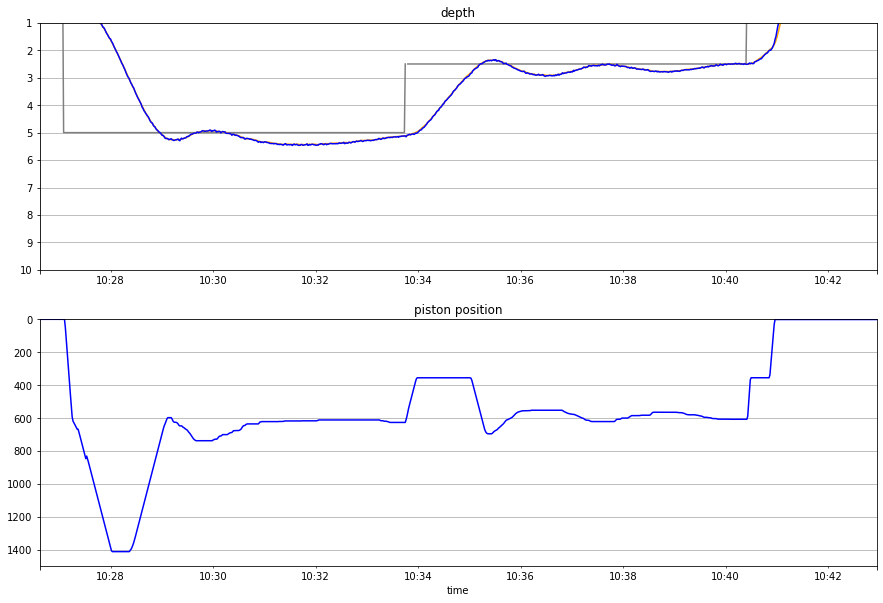

In [8]:
fig, ax = plt.subplots(2,1, figsize=(15,10))

f = bags[4] # bassin2
#f = bags[-1] # bassin3
bdata = sb.load_bag(f)
df = sb.resample_join('1s',
                  bdata['depthFusion']['depth'],
                  bdata['kalman']['depth'].rename('depth_kalman'),
                  bdata['pistonState']['position'],
                  bdata['mission']['depth'].rename('depth_target')
                 )
df['depth_target'].plot(color='0.5',
                 ax=ax[0],
                 ylim=(1,10))
df['depth_kalman'].plot(color='orange',
                 ax=ax[0],
                 ylim=(1,10))
df['depth'].plot(color='b',
                 ax=ax[0],
                 ylim=(1,10))
df['position'].plot(color='b',
                    ax=ax[1],
                    ylim=(0,1500))
ax[0].invert_yaxis()
ax[0].grid()
ax[0].set_title('depth')
ax[0].set_xlabel('')
#
ax[1].invert_yaxis()
ax[1].grid()
ax[1].set_title('piston position')